In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load audio files

pluck1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/FS/BS_1_EQ_1_FS_NO_1_10.wav')
pick1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/PK/BS_1_EQ_1_PK_NO_1_10.wav')
slap1, sr = librosa.load('/Users/adamdeedman/Documents/University/Lectures/Third Year/FYP/Python Stage/IDMT-SMT-BASS/PS/ST/BS_1_EQ_1_ST_NO_1_10.wav')

# finds length of each signal array
maxlen = max((len(pluck1)), (len(pick1)), (len(slap1)))

# pads all signals to max length
pluck1_pad = np.pad(pluck1, (0, maxlen - len(pluck1)), 'constant', constant_values=0)
pick1_pad = np.pad(pick1, (0, maxlen - len(pick1)), 'constant', constant_values=0)
slap1_pad = np.pad(slap1, (0, maxlen - len(slap1)), 'constant', constant_values=0)

In [3]:
# frame-length and hop-length

FL = 1024 # (frame-length)
HL = 512 # (hop-length)

In [4]:
# calculate spectral roll-off

sro_pluck1 = librosa.feature.spectral_rolloff(y=pluck1_pad, hop_length=HL, n_fft=FL)[0]
sro_pick1 = librosa.feature.spectral_rolloff(y=pick1_pad, hop_length=HL, n_fft=FL)[0]
sro_slap1 = librosa.feature.spectral_rolloff(y=slap1_pad, hop_length=HL, n_fft=FL)[0]


In [5]:
# calculate time

frames = range(0, sro_pluck1.size)
t = librosa.frames_to_time(frames, hop_length=HL)

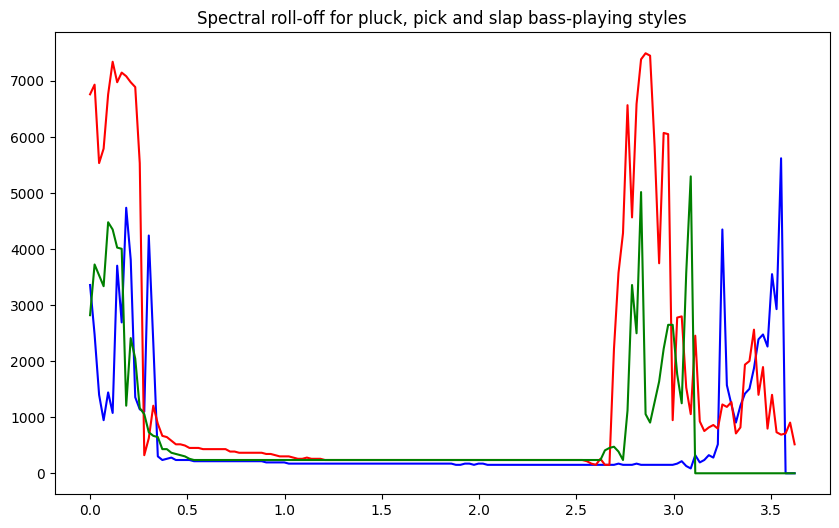

In [11]:
plt.figure(figsize=(10,6))
plt.plot(t, sro_pluck1, color="b")
plt.plot(t, sro_pick1, color="r")
plt.plot(t, sro_slap1, color="g")
plt.title("Spectral roll-off for pluck, pick and slap bass-playing styles")

plt.show()